In [1]:
# Import the required libraries
import yfinance as yf
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Using the yfinance API, get data for SPY and AAPL.

data = yf.download(["SPY", "AAPL"], start="2020-01-01", end="2022-12-31")

[*********************100%***********************]  2 of 2 completed


In [3]:
# Calculate the returns of the closing price using the built in pct_change() function

closes = data['Adj Close']
spy_returns = closes.SPY.pct_change().dropna()
aapl_returns = closes.AAPL.pct_change().dropna()

In [4]:
# Compute the Sortino Ratio

def sortino_ratio(returns, adjustment_factor=0.0):
    """
    Determines the Sortino ratio of a strategy.
    
    Parameters
    ----------
    returns : pd.Series or np.ndarray
        Daily returns of the strategy, noncumulative.
        adjustment_factor : int, float
        Constant daily benchmark return throughout the period.

    Returns
    -------
    sortino_ratio : float

    Note
    -----
    See `<https://www.sunrisecapital.com/wp-content/uploads/2014/06/Futures_
    Mag_Sortino_0213.pdf>`__ for more details.
    """
    
    # compute annualized return
    returns_risk_adj = np.asanyarray(returns - adjustment_factor)
    mean_annual_return = returns_risk_adj.mean() * 252

    # compute the downside deviation
    downside_diff = np.clip(returns_risk_adj, np.NINF, 0)
    np.square(downside_diff, out=downside_diff)
    annualized_downside_deviation = np.sqrt(downside_diff.mean()) * np.sqrt(252)
    
    return mean_annual_return / annualized_downside_deviation

In [5]:
# Compute the Sortino ratio for AAPL and SPY.

# sortino ratio for SPY
print("Sortino Rato, SPY returns")
display(sortino_ratio(spy_returns))
print()
print("Sortino Ratio, AAPL returns")
# sortino ratio for AAPL
display(sortino_ratio(aapl_returns))

Sortino Rato, SPY returns


0.601135806288868


Sortino Ratio, AAPL returns


1.1302769108087218

The Sortino ratio for AAPL is higher than for SPY. That means you got more return for every unit of downside risk.

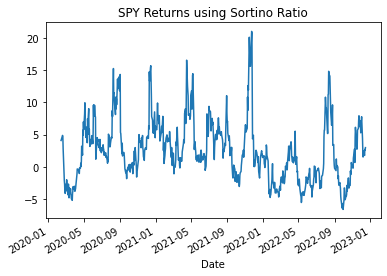

In [6]:
# It’s always useful to look at performance metrics through time because they are never static.
spy_returns.rolling(30).apply(sortino_ratio).plot(title="SPY Returns using Sortino Ratio");

# Save the figure.
plt.savefig(f"./Images/SPYRollingReturns.jpg")

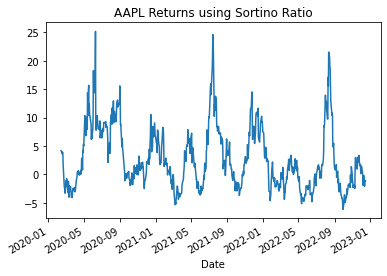

In [7]:
aapl_returns.rolling(30).apply(sortino_ratio).plot(title="AAPL Returns using Sortino Ratio");
# Save the figure.
plt.savefig(f"./Images/AaplRollingReturns.jpg")

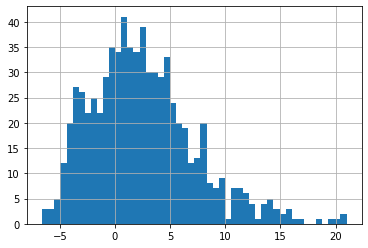

In [8]:
# Use a histogram to visualize the distribution of rolling Sortino ratios. 
spy_returns.rolling(30).apply(sortino_ratio).hist(bins=50);

# Save the figure.
plt.savefig(f"./Images/SPYReturnsHistogram.jpg")

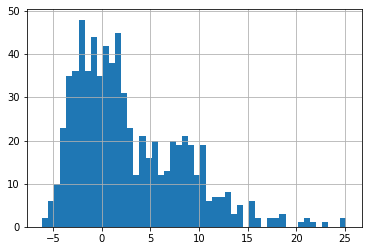

In [9]:
# In the case of AAPL, there is a long tail of positive Sortino ratios.
aapl_returns.rolling(30).apply(sortino_ratio).hist(bins=50);

# Save the figure.
plt.savefig(f"./Images/AaplReturnsHistogram.jpg")

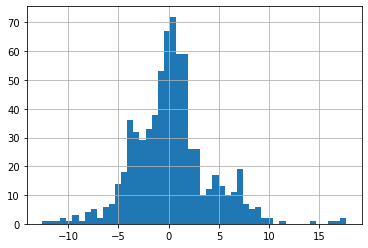

In [10]:
# let’s see how the Sortino ratios of AAPL and SPY compare through time. 
# Was AAPL always a better risk adjusted return?

# Subtract the SPY Sortino ratio from the AAPL Sortino ratio and plot the result as a histogram.

(
    aapl_returns.rolling(30).apply(sortino_ratio)
    - spy_returns.rolling(30).apply(sortino_ratio)
).hist(bins=50);

# Save the figure.
plt.savefig(f"./Images/combinedHistogram.jpg")

The histogram looks like two overlapping distributions. One distribution is centered around 0 and looks to be skewed left. The other distribution looks to center around 5 and be more even. This might reflect two different periods of time. One where SPY outperformed AAPL and another where AAPL outperformed SPY.

Without the Sortino ratio, you might miss this important information about performance.